In [422]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [340]:
train = pd.read_csv('C:/Users/Lenovo/Downloads/training_set_features.csv')

In [342]:
target = pd.read_csv('C:/Users/Lenovo/Downloads/training_set_labels.csv')

In [344]:
print('Train shape:', train.shape)
# print('Test shape:', test.shape)
print('Target shape:', target.shape)

Train shape: (26707, 36)
Target shape: (26707, 3)


In [346]:
train.head(3)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo


In [348]:
target.head(3)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0


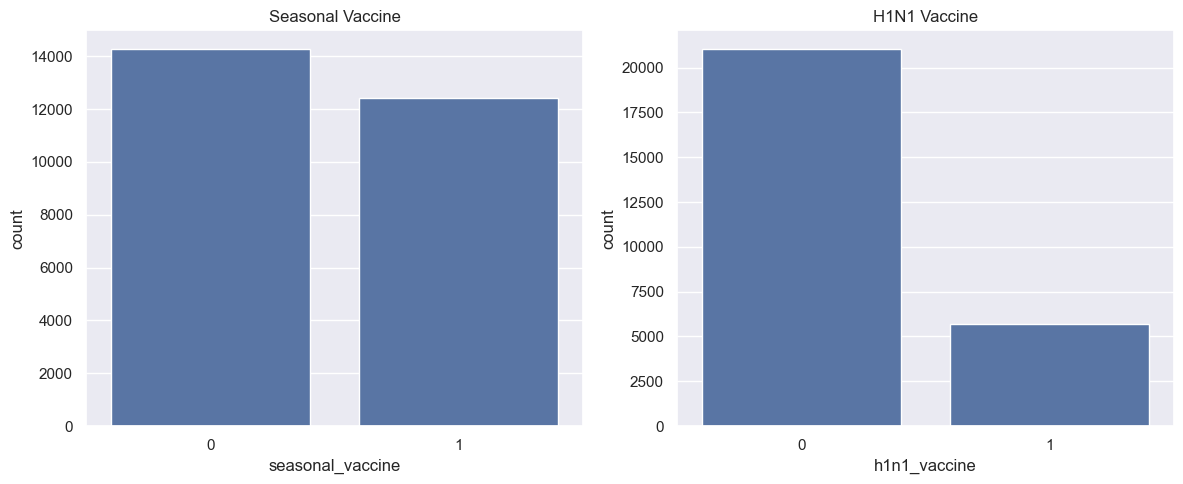

In [350]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  
sns.countplot(x='seasonal_vaccine', data=target, ax=axes[0])
axes[0].set_title('Seasonal Vaccine')

sns.countplot(x='h1n1_vaccine', data=target, ax=axes[1])
axes[1].set_title('H1N1 Vaccine')

plt.tight_layout()
plt.show()

In [351]:
df = pd.merge(train, target)
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [352]:
df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [356]:
train = train.index

In [358]:
nulls = df.isna().sum()
nulls = nulls[nulls != 0]
nulls

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
education                       1407
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
household_adults                 249
h

In [360]:
temp = nulls / df.shape[0] * 100
temp = temp.sort_values()

for x, name in zip(temp, temp.index):
    print(f'{name: <18}: ' + f'{round(x, 2)}'.ljust(4,'0') + '%')

behavioral_face_mask: 0.07%
behavioral_wash_hands: 0.16%
behavioral_antiviral_meds: 0.27%
behavioral_outside_home: 0.31%
behavioral_large_gatherings: 0.33%
h1n1_concern      : 0.34%
h1n1_knowledge    : 0.43%
behavioral_touch_face: 0.48%
behavioral_avoidance: 0.78%
household_children: 0.93%
household_adults  : 0.93%
opinion_h1n1_risk : 1.45%
opinion_h1n1_vacc_effective: 1.46%
opinion_h1n1_sick_from_vacc: 1.48%
opinion_seas_vacc_effective: 1.73%
opinion_seas_risk : 1.92%
opinion_seas_sick_from_vacc: 2.01%
health_worker     : 3.01%
child_under_6_months: 3.07%
chronic_med_condition: 3.64%
education         : 5.27%
marital_status    : 5.27%
employment_status : 5.48%
rent_or_own       : 7.65%
doctor_recc_h1n1  : 8.09%
doctor_recc_seasonal: 8.09%
income_poverty    : 16.56%
health_insurance  : 45.96%
employment_industry: 49.91%
employment_occupation: 50.44%


In [362]:
df.drop(columns=['employment_occupation', 'employment_industry', 'health_insurance'], inplace=True)
df.shape

(26707, 35)

In [364]:
cat_cols = list(df.select_dtypes(include=['object']).columns.values)
df[cat_cols].nunique()

age_group             5
education             4
race                  4
sex                   2
income_poverty        3
marital_status        2
rent_or_own           2
employment_status     3
hhs_geo_region       10
census_msa            3
dtype: int64

In [366]:
df.dropna(inplace=True)
df.shape

(19642, 35)

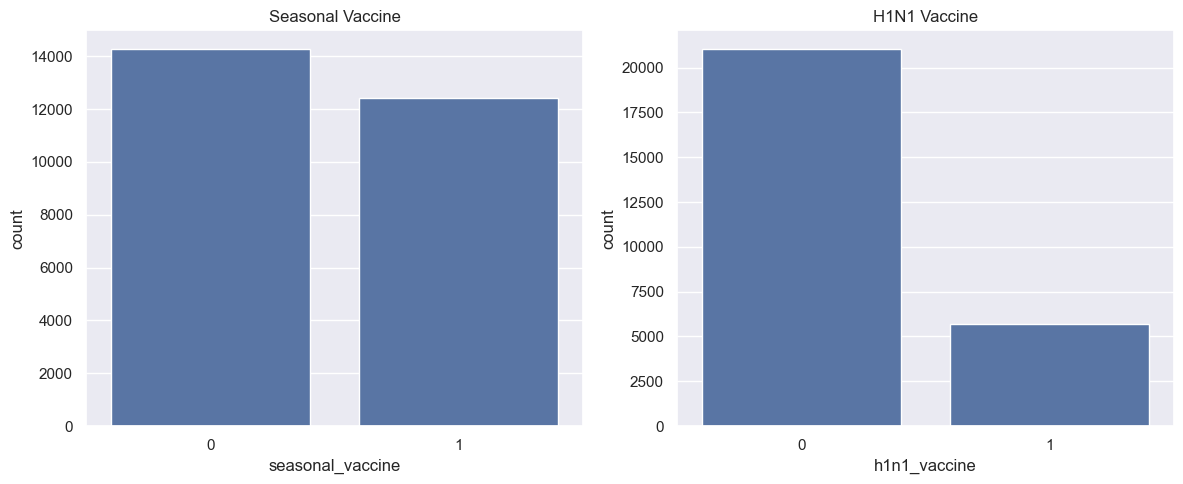

In [368]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  
sns.countplot(x='seasonal_vaccine', data=target, ax=axes[0])
axes[0].set_title('Seasonal Vaccine')

sns.countplot(x='h1n1_vaccine', data=target, ax=axes[1])
axes[1].set_title('H1N1 Vaccine')

plt.tight_layout()
plt.show()

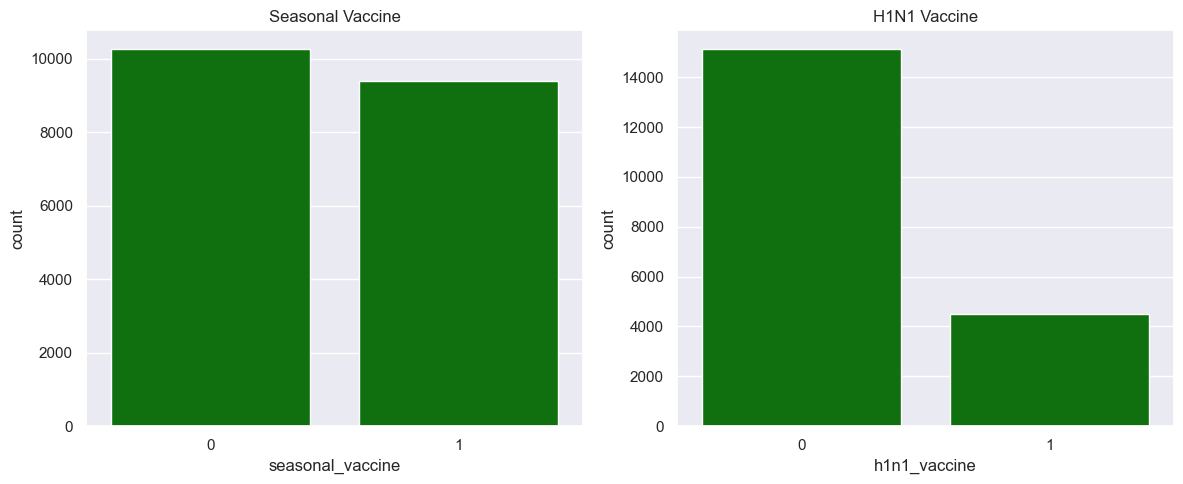

In [370]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  
sns.countplot(x='seasonal_vaccine', data=df, ax=axes[0], color='green')
axes[0].set_title('Seasonal Vaccine')

sns.countplot(x='h1n1_vaccine', data=df, ax=axes[1], color='green')
axes[1].set_title('H1N1 Vaccine')

plt.tight_layout()
plt.show()

In [372]:
string_cols = list(df.select_dtypes(include=['object']).columns.values)
for col in string_cols:
    df[col] = df[col].apply(str.lower)

In [374]:
num_cols = list(df.select_dtypes(include=['int64', 'float64']).columns.values)
cat_cols = list(df.select_dtypes(include=['object']).columns.values)

In [376]:
new_names = []
for col in cat_cols:
    encoded_features = pd.get_dummies(df[col])
    tmp_names = []
    for col_id in encoded_features.columns: 
        name = f'{col}_{col_id}'
        new_names.append(name)
        tmp_names.append(name)
    encoded_features.columns = tmp_names
    df = pd.concat([df, encoded_features], axis=1)
    
df.drop(columns=cat_cols, inplace=True)
cat_cols = new_names
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_msa, not principle city","census_msa_msa, principle city",census_msa_non-msa
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,True,False,False,False,True
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,True,False,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,False,False,True,False,False,False,False,False,True,False
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,True,True,False,False
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,False,False,False,True,False,False,False,False,True,False
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,True,False,False,False,False,False,False,False,True,False
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,True,False,False,True
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [378]:
df.drop(columns=['seasonal_vaccine', 'h1n1_vaccine'], inplace=False)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_msa, not principle city","census_msa_msa, principle city",census_msa_non-msa
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,True,False,False,False,True
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,True,False,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,False,False,True,False,False,False,False,False,True,False
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,True,True,False,False
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,False,False,False,True,False,False,False,False,True,False
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,True,False,False,False,False,False,False,False,True,False
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,True,False,False,True
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [380]:
X = df.drop(columns=['seasonal_vaccine', 'h1n1_vaccine'])
y = df[['seasonal_vaccine', 'h1n1_vaccine']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      
    random_state=42    
)

print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train shape: (15713, 61)
Test shape: (3929, 61)
Train target shape: (15713, 2)
Test target shape: (3929, 2)


In [382]:
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train shape: (15713, 61)
Test shape: (3929, 61)
Train target shape: (15713, 2)
Test target shape: (3929, 2)


In [384]:
X_train.drop(columns=['respondent_id'], inplace=True)
X_test.drop(columns=['respondent_id'], inplace=True)

In [386]:
print('Min std:', abs(df.describe().std()).min())

Min std: 6943.277505954305


In [388]:
num_cols.remove('respondent_id')
num_cols.remove('seasonal_vaccine')
num_cols.remove('h1n1_vaccine')
num_cols

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [390]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [392]:
sns.set()

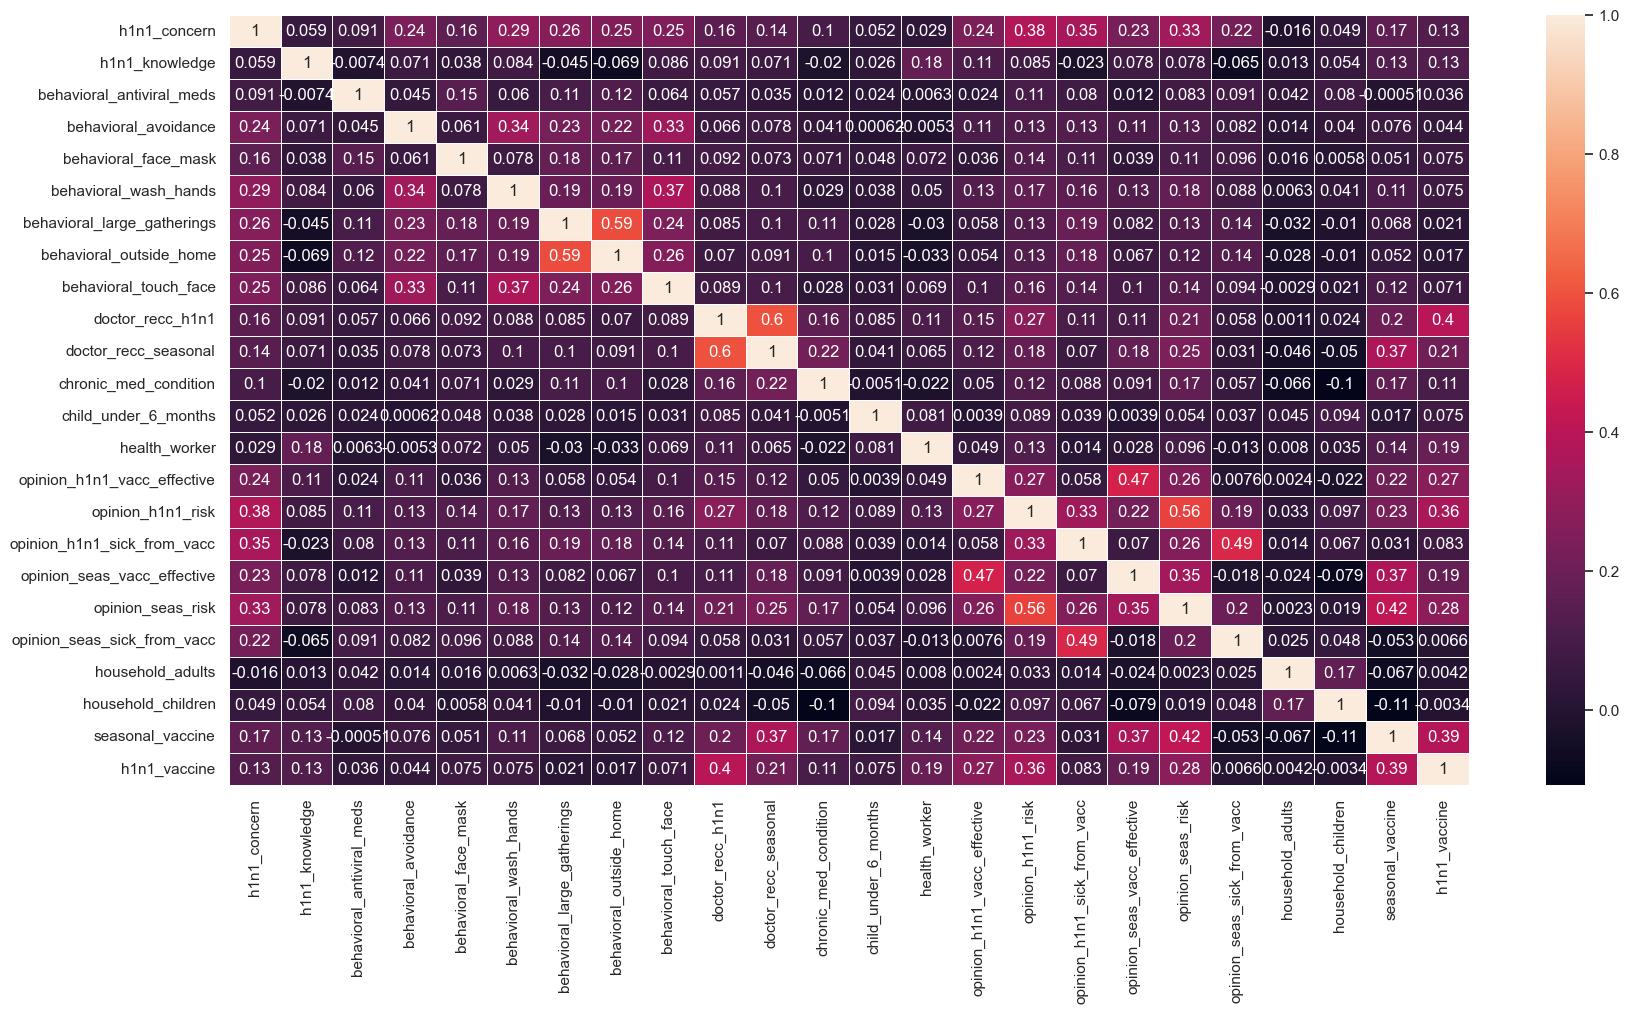

In [394]:
fig, ax = plt.subplots(figsize=(20,10))
num_cols.append('seasonal_vaccine')
num_cols.append('h1n1_vaccine')
sns.heatmap(df[num_cols].corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [488]:
reg = MultiOutputClassifier(LogisticRegression(max_iter=5000))
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f1.round(3))

0.662


In [490]:
clf = MultiOutputClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f1.round(3))

0.613


In [494]:
rf = MultiOutputClassifier(RandomForestClassifier())
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f1.round(3))

0.64


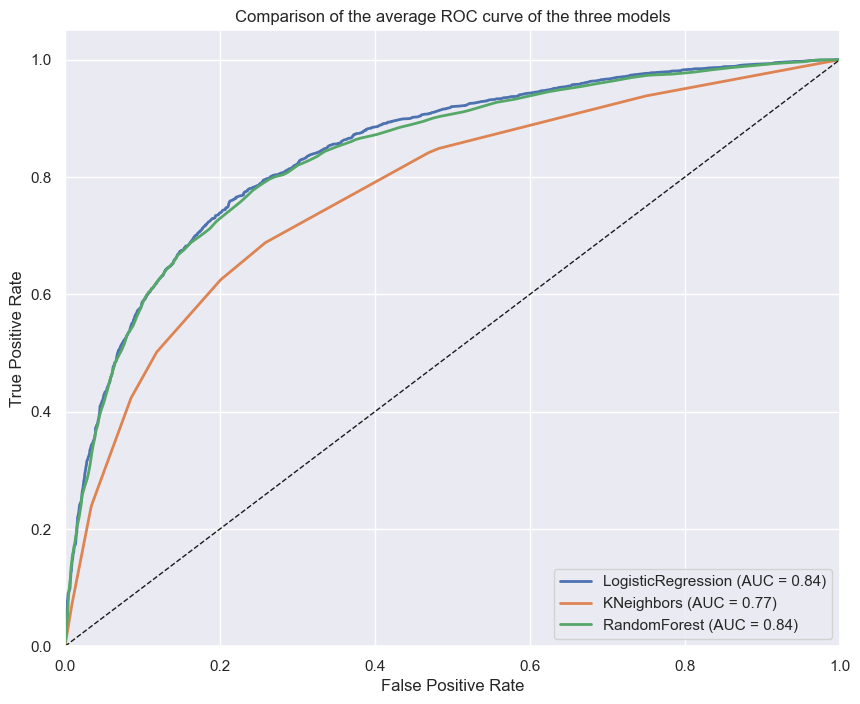

In [496]:
models = {
    "LogisticRegression": reg,
    "KNeighbors": clf,
    "RandomForest": rf 
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_targets = y_test.shape[1]

    for i in range(n_targets):
        y_true_i = y_test.iloc[:, i].values if hasattr(y_test, 'iloc') else y_test[:, i]
        fpr[i], tpr[i], _ = roc_curve(y_true_i, y_proba[i][:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_targets)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_targets):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_targets

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    plt.plot(fpr["macro"], tpr["macro"], lw=2, label=f"{name} (AUC = {roc_auc['macro']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of the average ROC curve of the three models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [436]:
log_params = {
    'estimator__C': np.linspace(1, 100, 100),
    'estimator__penalty': ['l2'], 
    'estimator__max_iter': [5000]
}
gs = GridSearchCV(MultiOutputClassifier(LogisticRegression()), log_params, scoring='f1_macro')
gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')  
print(f1.round(3))

0.663


In [446]:
gs.best_params_

{'estimator__C': 2.0, 'estimator__max_iter': 5000, 'estimator__penalty': 'l2'}

In [454]:
knn_params = {
    'estimator__n_neighbors': np.arange(1, 20, 2),
    'estimator__weights': ['uniform', 'distance'],
    'estimator__p': [1, 2]
}
gs = GridSearchCV(MultiOutputClassifier(KNeighborsClassifier()), knn_params, scoring='f1_macro')
gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')  
print(f1.round(3))

0.615


In [456]:
gs.best_params_

{'estimator__n_neighbors': 17,
 'estimator__p': 2,
 'estimator__weights': 'uniform'}

In [462]:
rf_params = {
    'estimator__n_estimators': [100, 300, 500],  
    'estimator__max_features': ['sqrt', 'log2'] 
}
gs = GridSearchCV(MultiOutputClassifier(RandomForestClassifier()), rf_params, scoring='f1_macro')
gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')  
print(f1.round(3))

0.653


In [464]:
gs.best_params_

{'estimator__max_features': 'sqrt', 'estimator__n_estimators': 500}